<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Sep8-9/Ejemplos_de_Scikit_learn_y_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

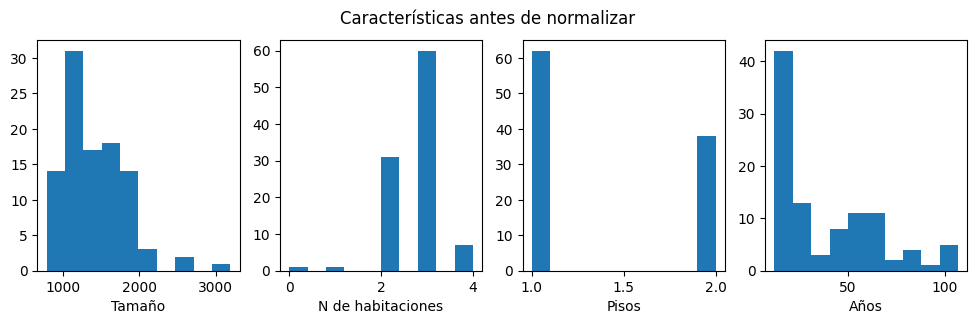

In [8]:
houses=np.loadtxt("/content/houses.txt",delimiter=',')
Xh=houses[:,:4]
th=houses[:,4] #Costo
labels=["Tamaño","N de habitaciones","Pisos","Años"]

scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh) #Normalizando Xh

fig,ax=plt.subplots(1, 4, figsize=(12, 3)) #Arreglo para generar los histogramas

for i in range(len(ax)):
    ax[i].hist(Xh[:,i]) #Grafico el histograma de cada característica
    ax[i].set_xlabel(labels[i])
fig.suptitle("Características antes de normalizar")
plt.show() #Muestro cada histograma

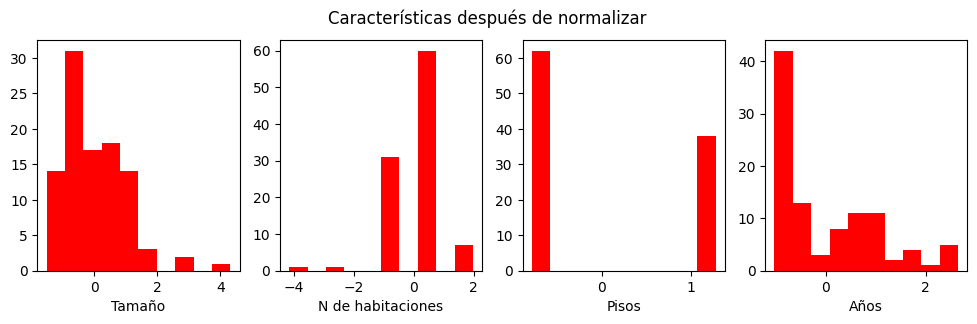

In [20]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3)) #Arreglo para generar los histogramas
for i in range(len(ax)):
    ax[i].hist(Xh_norm[:,i],color="red") #Grafico el histograma de cada característica PERO NORMALIZADA "_norm"
    ax[i].set_xlabel(labels[i])
fig.suptitle("Características después de normalizar")
plt.show()

In [23]:
#Divido en conjunto de entrenamiento y validación

X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
Iteraciones: 24, Número de actualizaciones de los pesos: 1681.0
Párametros del modelo  w0: [361.28477295], Pesos w:[110.21916353 -22.52589402 -34.70148446 -38.67052761]


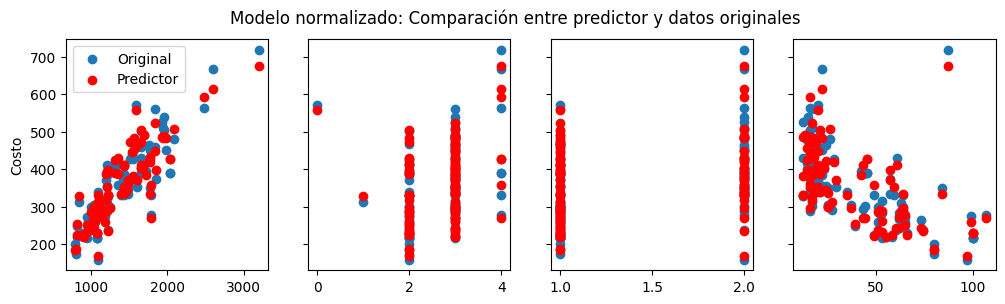

In [30]:
#Método de mínimos cuadrados con Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
#100 iteraciones, función de costo cuadrática, taza de aprendizaje constante, alpha=0.01 y sin penalización; método no regularizado.
sgdr.fit(X_train, y_train) #Le envio los datos de entrenamiento al conjunto
print(sgdr)
print(f"Iteraciones: {sgdr.n_iter_}, Número de actualizaciones de los pesos: {sgdr.t_}")

w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"Párametros del modelo  w0: {w0_norm}, Pesos w:{w_norm}")

#¿Qué tanta relación hay entre el modelo generado por el conjunto de entrenamiento y el conjunto de validación
sgdr.score(X_test,y_test)

#Construyo el modelo del predictor usando los datos ya normalizados
yp = w0_norm[0] #Arreglo de los datos predecidos por el modelo
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i] #Polinomio con los coeficientes de Xh

#Gráficas de los datos vs predictor
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'Original') #Grafico los datos originales
    ax[i].scatter(Xh[:,i],yp,color="red", label = 'Predictor') #Grafico los datos del predictor
ax[0].set_ylabel("Costo"); ax[0].legend();
fig.suptitle("Modelo normalizado: Comparación entre predictor y datos originales")
plt.show()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 229ms/step - loss: 140479.2344
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 134888.9375
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 129527.4609
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 124385.1562
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 119452.8984
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 114721.8672
Epoch 7/100
1/1 [==============================]

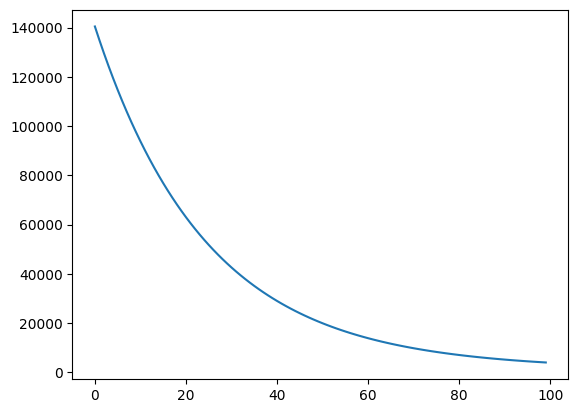

In [41]:
#Solución con Keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2) #Semilla
model = Sequential()

input_dim = 4 #Tamaño de los datos de entrada
output_dim = 1 #Tamaño de los datos de salida
model.add(Dense(output_dim, input_dim=input_dim, activation='linear')) #Modelo lineal
sgd = SGD(learning_rate=0.01) #Gradiente descendiente estocástico
model.compile(loss='mse', optimizer=sgd)
#mse significa mean squared root; valor promedio al cuadrado entre la diferencia del valor predecido y el real ¿varianza?
model.summary()

num_epochs = 100
batch_size =X_train.shape[0]
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size) #Ajusto el modelo
#Epochs es el número de epocas, que es el numero de veces que se va a actualizar el conjunto de datos
#Batch_size es el número de datos con los que va a trabajar el método

capas = model.layers[0] #Red neuronal de una capa
w, b = capas.get_weights() #Pesos w y w0
print(w,b)

history_df = pd.DataFrame(history.history) #Conjunto de datos de entrenamiento
history_df['loss'].plot(); #Graficando con Pandas la perdida

Epoch 1/100
1/1 [==============================] - 0s 11ms/step - loss: 424.7858
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 424.7505
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 424.7154
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 424.6808
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 424.6466
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 424.6130
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 424.5796
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 424.5465
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 424.5141
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 424.4819
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 424.4502
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 424.4186
Epoch 13/100
1/1 [===========

509.1376037597656

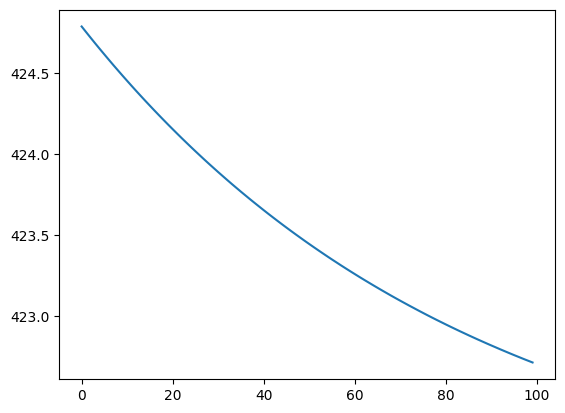

In [47]:
#Continuación de Keras: Ajustando el modelo nuevamente
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size) #Vuelvo a ajustar el modelo

capas = model.layers[0] #Red neuronal de una capa
w, b = capas.get_weights() #Pesos w y w0
print(w,b)

#Conjunto de datos de entrenamiento
history_df = pd.DataFrame(history2.history)
#Graficando con pandas la perdida
history_df['loss'].plot();

#Relación entre el modelo pronosticado y el conjunto de entrenamiento
score = model.evaluate(X_test, y_test, verbose=0)
score

SGDRegressor(learning_rate='constant')
Iteraciones: 19, Numero de actualizaciones de los pesos: 1901.0
Costos del del modelo:  w0: [362.13835518], pesos w:[110.8808732  -21.42296848 -32.61213301 -38.48924867]


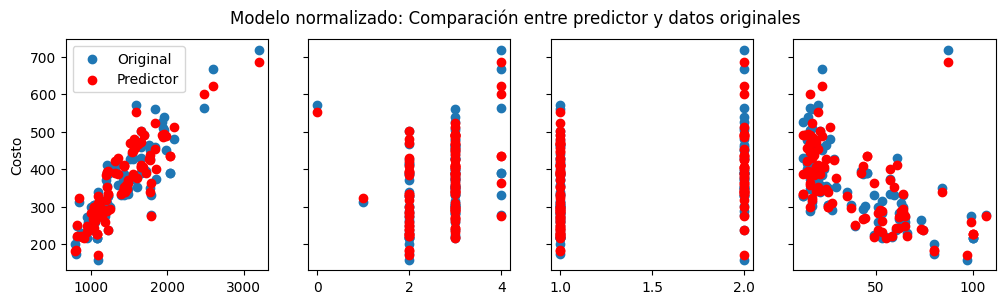

In [27]:
#Solución con Sklearn

sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01) #1000 iteraciones, ritmo constante de aprendizaje y alpha=0.01
sgdr.fit(Xh_norm, th) #Uso los datos normalizados Xh para aplicar el método
print(sgdr)
print(f"Iteraciones: {sgdr.n_iter_}, Numero de actualizaciones de los pesos: {sgdr.t_}")

w0_norm = sgdr.intercept_ #Termino independiente w0
w_norm = sgdr.coef_ #Coeficientes del modelo w1x+w2x+w3x+w4x
print(f"Costos del del modelo:  w0: {w0_norm}, pesos w:{w_norm}")

#Construyo el modelo del predictor usando los datos ya normalizados
yp = w0_norm[0] #Arreglo de los datos predecidos por el modelo
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i] #Polinomio con los coeficientes de Xh

#Gráficas de los datos vs predictor
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'Original') #Grafico los datos originales
    ax[i].scatter(Xh[:,i],yp,color="red", label = 'Predictor') #Grafico los datos del predictor
ax[0].set_ylabel("Costo"); ax[0].legend();
fig.suptitle("Modelo normalizado: Comparación entre predictor y datos originales")
plt.show()